## подготовка данных

In [12]:
import pandas as pd
from PIL import Image
import os

In [28]:
annotations_path = "./dataset/combined_annotations.csv"

In [29]:
annotations = pd.read_csv(annotations_path)

In [30]:
annotations.head()

file_path  label  season_id  survey_id
0      ./combined_dataset\20130718_210056.jpg      4          2          1
1  ./combined_dataset\20130718_210056_001.jpg      4          2          1
2  ./combined_dataset\20130718_210056_002.jpg      4          2          1
3      ./combined_dataset\20130718_210110.jpg      4          2          1
4      ./combined_dataset\20130718_210628.jpg      4          2          1

In [31]:
annotations['file_path'] = annotations['file_path'].str.replace('\\', '/', regex=False)


In [32]:
annotations['file_path'] = "./dataset/" + annotations['file_path'] 

In [34]:
annotations['file_path'] = annotations['file_path'].str.replace('./combined_dataset', 'cropped_dataset', regex=False)

In [35]:
annotations.head()

file_path  label  season_id  \
0      ./dataset/cropped_dataset/20130718_210056.jpg      4          2   
1  ./dataset/cropped_dataset/20130718_210056_001.jpg      4          2   
2  ./dataset/cropped_dataset/20130718_210056_002.jpg      4          2   
3      ./dataset/cropped_dataset/20130718_210110.jpg      4          2   
4      ./dataset/cropped_dataset/20130718_210628.jpg      4          2   

   survey_id  
0          1  
1          1  
2          1  
3          1  
4          1

In [40]:
def load_image(file_path):
    try:
        # Открыть изображение с использованием PIL
        with Image.open(file_path) as img:
            img = img.convert("RGB")  # Преобразование в формат RGB
            return img
    except Exception as e:
        print(f"Ошибка при загрузке изображения {file_path}: {e}")
        return None

In [16]:
for _, row in annotations.iterrows():
    file_path = row['file_path']
    label = row['label']  # Метка (идентификатор лисы)
    
    # Проверка наличия файла
    if os.path.exists(file_path):
        image = load_image(file_path)
        print(f"Загружено изображение {file_path} с меткой {label}")
    else:
        print(f"Файл не найден: {file_path}")

Загружено изображение ./dataset/./combined_dataset/20130718_210056.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210056_001.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210056_002.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210110.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210628.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210628_001.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210628_002.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210653.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210653_001.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_210653_002.jpg с меткой 4
Загружено изображение ./dataset/./combined_dataset/20130718_211936.jpg с меткой 3
Загружено изображение ./dataset/./combined_dataset/20130718_211936_001.jpg

KeyboardInterrupt: 

In [9]:
from torchvision import transforms
import torch

In [10]:
# Пример преобразований изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Изменение размера
    transforms.ToTensor(),         # Преобразование в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация
])

In [38]:
data = []
labels = []

In [41]:
for _, row in annotations.iterrows():
    file_path = row['file_path']
    label = row['label']
    
    if os.path.exists(file_path):
        image = load_image(file_path)
        if image:
            image = transform(image)  # Применение преобразований
            data.append(image)
            labels.append(label)

In [42]:
data_tensor = torch.stack(data)
labels_tensor = torch.tensor(labels)

In [43]:
print(f"Размер данных: {data_tensor.shape}")
print(f"Размер меток: {labels_tensor.shape}")

Размер данных: torch.Size([12478, 3, 224, 224])
Размер меток: torch.Size([12478])


In [44]:
data_tensor_path = "data_tensor_cutted.pt"
labels_tensor_path = "labels_tensor_cutted.pt"

In [45]:
torch.save(data_tensor, data_tensor_path)
torch.save(labels_tensor, labels_tensor_path)

## данные

In [42]:
data_tensor_path = "data_tensor_cutted.pt"
labels_tensor_path = "labels_tensor_cutted.pt"

In [43]:
data_tensor = torch.load(data_tensor_path)
labels_tensor = torch.load(labels_tensor_path)

/tmp/ipykernel_9442/1818967108.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_tensor = torch.load(data_tensor_path)
/tmp/ipykernel_9442/1818967108.py:2: FutureWarn

In [44]:
print(f"Размер данных: {data_tensor.shape}")
print(f"Размер меток: {labels_tensor.shape}")

Размер данных: torch.Size([12478, 3, 224, 224])
Размер меток: torch.Size([12478])


In [45]:
# Найти самое частое значение в labels_tensor
selected_label = labels_tensor.bincount().argmax().item()
print(f"Самая частая метка: {selected_label}")

Самая частая метка: 3


In [51]:
# data_loader = DataLoader(TensorDataset(data_tensor, labels_tensor), batch_size=32, shuffle=True)

In [46]:
bin_label_tensor = (labels_tensor == selected_label).int()

In [49]:
data_loader = DataLoader(TensorDataset(data_tensor, bin_label_tensor), batch_size=32, shuffle=True)

In [50]:
torch.cuda.is_available()

True

## ResNet

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, TensorDataset

In [180]:
# Определение модели
model = models.resnet101(pretrained=True)  # Используем ResNet-18
model.fc = nn.Linear(model.fc.in_features, 1)  # Бинарная классификация
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

/home/ubuntu/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [72]:
class F1Loss(nn.Module):
    def __init__(self):
        super(F1Loss, self).__init__()

    def forward(self, logits, targets):
        # Применяем сигмоиду к логитам
        probs = torch.sigmoid(logits)
        
        # Вычисляем TP, FP и FN
        tp = (probs * targets).sum(dim=0)  # True Positives
        fp = ((1 - targets) * probs).sum(dim=0)  # False Positives
        fn = (targets * (1 - probs)).sum(dim=0)  # False Negatives
        
        # Вычисляем F1
        f1 = 2 * tp / (2 * tp + fp + fn + 1e-8)  # Добавляем epsilon для избежания деления на 0
        f1_loss = 1 - f1.mean()  # Потери: максимизация F1 = минимизация 1 - F1
        
        return f1_loss

In [97]:
class PrecisionLoss(nn.Module):
    def __init__(self):
        super(PrecisionLoss, self).__init__()

    def forward(self, logits, targets):
        """
        Аргументы:
        logits: Тензор логитов (сырые выходы модели).
        targets: Истинные метки (0 или 1).
        """
        # Применение сигмоиды для преобразования логитов в вероятности
        probs = torch.sigmoid(logits)

        # Вычисление TP, FP
        tp = (probs * targets).sum()  # True Positives
        fp = ((1 - targets) * probs).sum()  # False Positives

        # Precision: TP / (TP + FP + epsilon)
        precision = tp / (tp + fp + 1e-8)

        # Потери: минимизируем 1 - Precision
        precision_loss = 1 - precision

        return precision_loss

In [181]:
criterion = nn.BCEWithLogitsLoss()
# criterion = F1Loss()
# criterion = PrecisionLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def train_model(model, data_loader, criterion, optimizer, num_epochs=10):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    train_losses = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        all_preds = []
        all_labels = []

        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device).float()

            # Forward
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).int()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_loss /= len(data_loader.dataset)

        # Преобразование меток в бинарные, если требуется
        all_preds = [1 if p == 1 else 0 for p in all_preds]
        all_labels = [1 if l == 1 else 0 for l in all_labels]

        # Вычисление метрик
        precision = precision_score(all_labels, all_preds, average='binary')
        recall = recall_score(all_labels, all_preds, average='binary')
        f1 = f1_score(all_labels, all_preds, average='binary')
        accuracy = sum([p == l for p, l in zip(all_preds, all_labels)]) / len(all_labels)

        train_losses.append(train_loss)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

    # Визуализация метрик
    plt.figure(figsize=(12, 5))
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, precisions, label='Precision', color='blue')
    plt.plot(epochs, recalls, label='Recall', color='orange')
    plt.plot(epochs, f1_scores, label='F1-Score', color='green')
    plt.plot(epochs, accuracies, label='Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Metrics')
    plt.legend()
    plt.show()


Epoch 1/10: Train Loss: 0.3551, Precision: 0.5775, Recall: 0.2470, F1-Score: 0.3460, Accuracy: 0.8443
Epoch 2/10: Train Loss: 0.3047, Precision: 0.6185, Recall: 0.4012, F1-Score: 0.4867, Accuracy: 0.8589
Epoch 3/10: Train Loss: 0.2660, Precision: 0.6590, Recall: 0.4978, F1-Score: 0.5672, Accuracy: 0.8733
Epoch 4/10: Train Loss: 0.2355, Precision: 0.6797, Recall: 0.5425, F1-Score: 0.6034, Accuracy: 0.8811
Epoch 5/10: Train Loss: 0.2138, Precision: 0.7167, Recall: 0.6007, F1-Score: 0.6536, Accuracy: 0.8938
Epoch 6/10: Train Loss: 0.1955, Precision: 0.7360, Recall: 0.6189, F1-Score: 0.6724, Accuracy: 0.8994
Epoch 7/10: Train Loss: 0.1900, Precision: 0.7333, Recall: 0.6156, F1-Score: 0.6693, Accuracy: 0.8985
Epoch 8/10: Train Loss: 0.1744, Precision: 0.7560, Recall: 0.6209, F1-Score: 0.6818, Accuracy: 0.9033
Epoch 9/10: Train Loss: 0.1659, Precision: 0.7853, Recall: 0.6045, F1-Score: 0.6831, Accuracy: 0.9065
Epoch 10/10: Train Loss: 0.1633, Precision: 0.7860, Recall: 0.6108, F1-Score: 0.68

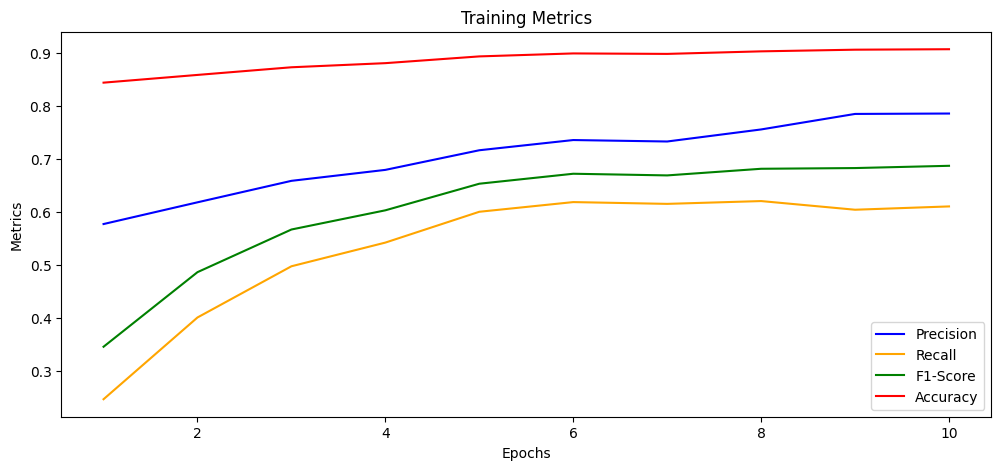

In [184]:
train_model(model, data_loader, criterion, optimizer, num_epochs=10)

In [185]:
torch.save(model.state_dict(), "./models/resnet101_weights.pth")

## ViT

In [2]:
from timm import create_model
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import torch

/home/ubuntu/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Определение модели
model = create_model("vit_base_patch16_224", pretrained=True, num_classes=1)  # Используем ViT
model.head = nn.Linear(model.head.in_features, 1)  # Бинарная классификация
model = model.to("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [202]:
criterion = nn.BCEWithLogitsLoss()
# criterion = F1Loss()
# criterion = PrecisionLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [203]:
def train_model(model, data_loader, criterion, optimizer, num_epochs=10):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    train_losses = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        all_preds = []
        all_labels = []

        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device).float()

            # Forward
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).int()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_loss /= len(data_loader.dataset)

        # Преобразование меток в бинарные, если требуется
        all_preds = [1 if p == 1 else 0 for p in all_preds]
        all_labels = [1 if l == 1 else 0 for l in all_labels]

        # Вычисление метрик
        precision = precision_score(all_labels, all_preds, average='binary')
        recall = recall_score(all_labels, all_preds, average='binary')
        f1 = f1_score(all_labels, all_preds, average='binary')
        accuracy = sum([p == l for p, l in zip(all_preds, all_labels)]) / len(all_labels)

        train_losses.append(train_loss)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

    # Визуализация метрик
    plt.figure(figsize=(12, 5))
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, precisions, label='Precision', color='blue')
    plt.plot(epochs, recalls, label='Recall', color='orange')
    plt.plot(epochs, f1_scores, label='F1-Score', color='green')
    plt.plot(epochs, accuracies, label='Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Metrics')
    plt.legend()
    plt.show()

Epoch 1/10: Train Loss: 0.4063, Precision: 0.4847, Recall: 0.0990, F1-Score: 0.1644, Accuracy: 0.8322
Epoch 2/10: Train Loss: 0.3608, Precision: 0.5682, Recall: 0.2422, F1-Score: 0.3396, Accuracy: 0.8429
Epoch 3/10: Train Loss: 0.3357, Precision: 0.5702, Recall: 0.2811, F1-Score: 0.3766, Accuracy: 0.8448
Epoch 4/10: Train Loss: 0.3198, Precision: 0.5904, Recall: 0.3359, F1-Score: 0.4282, Accuracy: 0.8504
Epoch 5/10: Train Loss: 0.3029, Precision: 0.5994, Recall: 0.3566, F1-Score: 0.4471, Accuracy: 0.8529
Epoch 6/10: Train Loss: 0.2901, Precision: 0.6182, Recall: 0.3820, F1-Score: 0.4722, Accuracy: 0.8576
Epoch 7/10: Train Loss: 0.2791, Precision: 0.6391, Recall: 0.4017, F1-Score: 0.4934, Accuracy: 0.8624
Epoch 8/10: Train Loss: 0.2709, Precision: 0.6392, Recall: 0.4214, F1-Score: 0.5080, Accuracy: 0.8638
Epoch 9/10: Train Loss: 0.2530, Precision: 0.6750, Recall: 0.4661, F1-Score: 0.5514, Accuracy: 0.8735
Epoch 10/10: Train Loss: 0.2491, Precision: 0.6678, Recall: 0.4628, F1-Score: 0.54

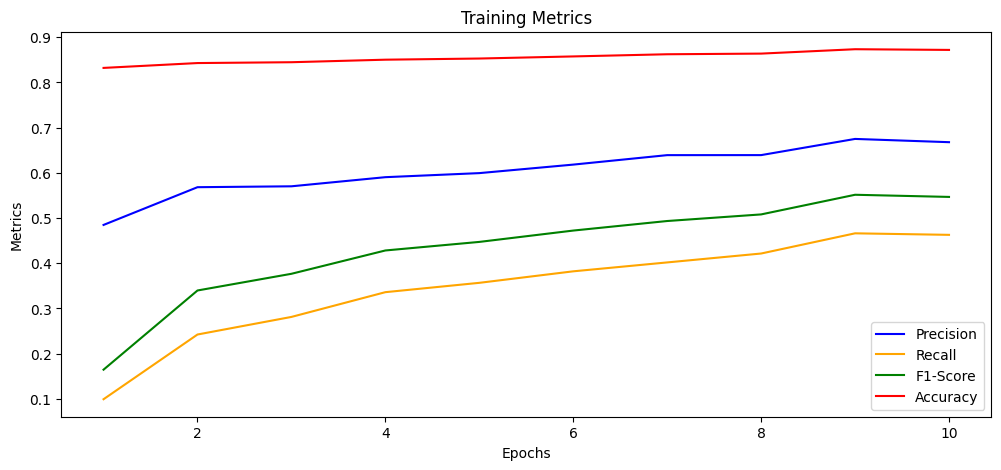

In [206]:
# Обучение модели
train_model(model, data_loader, criterion, optimizer, num_epochs=10)

In [213]:
torch.save(model.state_dict(), "./models/ViT_weights.pth")

## DeiT

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from timm import create_model
from sklearn.metrics import precision_score, recall_score, f1_score
from captum.attr import IntegratedGradients
import numpy as np
import cv2


In [39]:
# Определение модели
model = create_model("deit_base_patch16_224", pretrained=True, num_classes=1)  # Используем DeiT
model.head = nn.Linear(model.head.in_features, 1)  # Бинарная классификация
model = model.to("cuda" if torch.cuda.is_available() else "cpu")
device = "cuda" if torch.cuda.is_available() else "cpu"

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [40]:

def train_model(model, data_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        all_preds = []
        all_labels = []

        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device).float()

            # Forward
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).int()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_loss /= len(data_loader.dataset)

        # Преобразование меток в бинарные, если требуется
        all_preds = [1 if p == 1 else 0 for p in all_preds]
        all_labels = [1 if l == 1 else 0 for l in all_labels]

        # Вычисление метрик
        precision = precision_score(all_labels, all_preds, average='binary')
        recall = recall_score(all_labels, all_preds, average='binary')
        f1 = f1_score(all_labels, all_preds, average='binary')
        accuracy = sum([p == l for p, l in zip(all_preds, all_labels)]) / len(all_labels)

        train_losses.append(train_loss)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, "
              f"F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

    # Визуализация метрик
    plt.figure(figsize=(12, 5))
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, precisions, label='Precision', color='blue')
    plt.plot(epochs, recalls, label='Recall', color='orange')
    plt.plot(epochs, f1_scores, label='F1-Score', color='green')
    plt.plot(epochs, accuracies, label='Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Metrics')
    plt.legend()
    plt.show()


Epoch 1/10: Train Loss: 0.3744, Precision: 0.5532, Recall: 0.1898, F1-Score: 0.2826, Accuracy: 0.8393
Epoch 2/10: Train Loss: 0.3176, Precision: 0.6245, Recall: 0.3532, F1-Score: 0.4512, Accuracy: 0.8567
Epoch 3/10: Train Loss: 0.2640, Precision: 0.6618, Recall: 0.4767, F1-Score: 0.5542, Accuracy: 0.8721
Epoch 4/10: Train Loss: 0.2293, Precision: 0.6834, Recall: 0.5560, F1-Score: 0.6131, Accuracy: 0.8830
Epoch 5/10: Train Loss: 0.2013, Precision: 0.7034, Recall: 0.5983, F1-Score: 0.6466, Accuracy: 0.8909
Epoch 6/10: Train Loss: 0.1874, Precision: 0.7477, Recall: 0.5738, F1-Score: 0.6493, Accuracy: 0.8966
Epoch 7/10: Train Loss: 0.1744, Precision: 0.7558, Recall: 0.5949, F1-Score: 0.6658, Accuracy: 0.9004
Epoch 8/10: Train Loss: 0.1730, Precision: 0.7797, Recall: 0.5747, F1-Score: 0.6617, Accuracy: 0.9020
Epoch 9/10: Train Loss: 0.1644, Precision: 0.8008, Recall: 0.5661, F1-Score: 0.6633, Accuracy: 0.9042
Epoch 10/10: Train Loss: 0.1634, Precision: 0.8123, Recall: 0.5656, F1-Score: 0.66

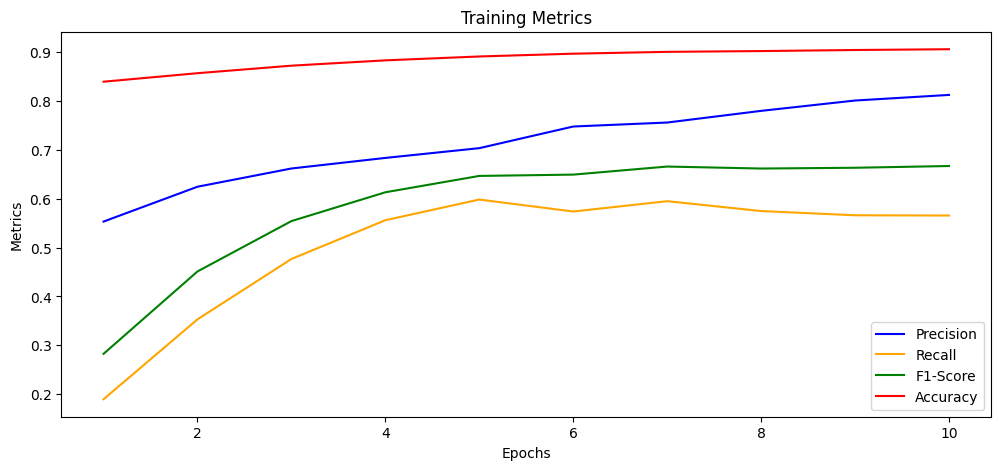

In [52]:
# Обучение модели
# Предполагается, что data_loader определён ранее и доступен
train_model(model, data_loader, criterion, optimizer, num_epochs=10)

In [54]:
torch.save(model.state_dict(), "./models/DeiT_weights.pth")

## ConViT

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from timm import create_model
from sklearn.metrics import precision_score, recall_score, f1_score
from captum.attr import IntegratedGradients
import numpy as np
import cv2

In [106]:
# Определение модели
model = create_model("convit_base", pretrained=True, num_classes=1)  # Используем ConViT
model.head = nn.Linear(model.head.in_features, 1)  # Бинарная классификация
model = model.to("cuda" if torch.cuda.is_available() else "cpu")
device = "cuda" if torch.cuda.is_available() else "cpu"


In [107]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [110]:
def train_model(model, data_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        all_preds = []
        all_labels = []

        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device).float().view(-1)  # Ensure labels have correct shape

            # Forward
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).int()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_loss /= len(data_loader.dataset)

        # Преобразование меток в бинарные, если требуется
        all_preds = [1 if p == 1 else 0 for p in all_preds]
        all_labels = [1 if l == 1 else 0 for l in all_labels]

        # Вычисление метрик
        precision = precision_score(all_labels, all_preds, average='binary')
        recall = recall_score(all_labels, all_preds, average='binary')
        f1 = f1_score(all_labels, all_preds, average='binary')
        accuracy = sum([p == l for p, l in zip(all_preds, all_labels)]) / len(all_labels)

        train_losses.append(train_loss)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, "
              f"Precision: {precision:.4f}, Recall: {recall:.4f}, "
              f"F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

    # Визуализация метрик
    plt.figure(figsize=(12, 5))
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, precisions, label='Precision', color='blue')
    plt.plot(epochs, recalls, label='Recall', color='orange')
    plt.plot(epochs, f1_scores, label='F1-Score', color='green')
    plt.plot(epochs, accuracies, label='Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Metrics')
    plt.legend()
    plt.show()

Epoch 1/10: Train Loss: 0.3809, Precision: 0.5757, Recall: 0.1571, F1-Score: 0.2469, Accuracy: 0.8401
Epoch 2/10: Train Loss: 0.3309, Precision: 0.6042, Recall: 0.3287, F1-Score: 0.4258, Accuracy: 0.8521
Epoch 3/10: Train Loss: 0.2864, Precision: 0.6342, Recall: 0.4440, F1-Score: 0.5223, Accuracy: 0.8646
Epoch 4/10: Train Loss: 0.2564, Precision: 0.6409, Recall: 0.5060, F1-Score: 0.5655, Accuracy: 0.8703
Epoch 5/10: Train Loss: 0.2280, Precision: 0.6793, Recall: 0.5425, F1-Score: 0.6033, Accuracy: 0.8810
Epoch 6/10: Train Loss: 0.2138, Precision: 0.6943, Recall: 0.5666, F1-Score: 0.6240, Accuracy: 0.8861
Epoch 7/10: Train Loss: 0.1950, Precision: 0.7356, Recall: 0.5776, F1-Score: 0.6471, Accuracy: 0.8949
Epoch 8/10: Train Loss: 0.1907, Precision: 0.7304, Recall: 0.5872, F1-Score: 0.6510, Accuracy: 0.8950
Epoch 9/10: Train Loss: 0.1788, Precision: 0.7520, Recall: 0.5901, F1-Score: 0.6613, Accuracy: 0.8992
Epoch 10/10: Train Loss: 0.1703, Precision: 0.7732, Recall: 0.5733, F1-Score: 0.65

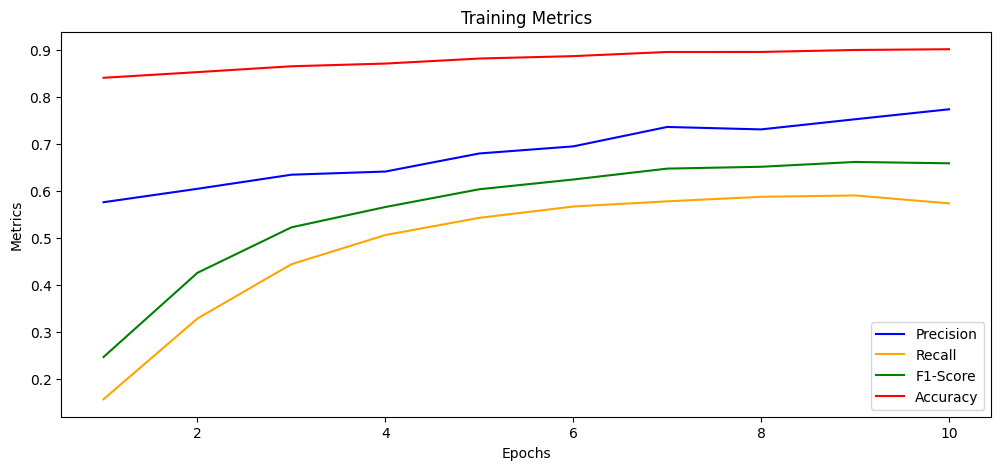

In [111]:
# Обучение модели
train_model(model, data_loader, criterion, optimizer, num_epochs=10)

In [112]:
torch.save(model.state_dict(), "./models/ConViT_weights.pth")

## загрузка модели

In [116]:
state_dict = torch.load("./models/ViT_weights.pth")

/tmp/ipykernel_9442/3741322755.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("./models/ViT_weights.pth")


In [117]:
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for ConVit:
	Missing key(s) in state_dict: "blocks.0.attn.gating_param", "blocks.0.attn.qk.weight", "blocks.0.attn.v.weight", "blocks.0.attn.pos_proj.weight", "blocks.0.attn.pos_proj.bias", "blocks.1.attn.gating_param", "blocks.1.attn.qk.weight", "blocks.1.attn.v.weight", "blocks.1.attn.pos_proj.weight", "blocks.1.attn.pos_proj.bias", "blocks.2.attn.gating_param", "blocks.2.attn.qk.weight", "blocks.2.attn.v.weight", "blocks.2.attn.pos_proj.weight", "blocks.2.attn.pos_proj.bias", "blocks.3.attn.gating_param", "blocks.3.attn.qk.weight", "blocks.3.attn.v.weight", "blocks.3.attn.pos_proj.weight", "blocks.3.attn.pos_proj.bias", "blocks.4.attn.gating_param", "blocks.4.attn.qk.weight", "blocks.4.attn.v.weight", "blocks.4.attn.pos_proj.weight", "blocks.4.attn.pos_proj.bias", "blocks.5.attn.gating_param", "blocks.5.attn.qk.weight", "blocks.5.attn.v.weight", "blocks.5.attn.pos_proj.weight", "blocks.5.attn.pos_proj.bias", "blocks.6.attn.gating_param", "blocks.6.attn.qk.weight", "blocks.6.attn.v.weight", "blocks.6.attn.pos_proj.weight", "blocks.6.attn.pos_proj.bias", "blocks.7.attn.gating_param", "blocks.7.attn.qk.weight", "blocks.7.attn.v.weight", "blocks.7.attn.pos_proj.weight", "blocks.7.attn.pos_proj.bias", "blocks.8.attn.gating_param", "blocks.8.attn.qk.weight", "blocks.8.attn.v.weight", "blocks.8.attn.pos_proj.weight", "blocks.8.attn.pos_proj.bias", "blocks.9.attn.gating_param", "blocks.9.attn.qk.weight", "blocks.9.attn.v.weight", "blocks.9.attn.pos_proj.weight", "blocks.9.attn.pos_proj.bias". 
	Unexpected key(s) in state_dict: "blocks.0.attn.qkv.weight", "blocks.0.attn.qkv.bias", "blocks.1.attn.qkv.weight", "blocks.1.attn.qkv.bias", "blocks.2.attn.qkv.weight", "blocks.2.attn.qkv.bias", "blocks.3.attn.qkv.weight", "blocks.3.attn.qkv.bias", "blocks.4.attn.qkv.weight", "blocks.4.attn.qkv.bias", "blocks.5.attn.qkv.weight", "blocks.5.attn.qkv.bias", "blocks.6.attn.qkv.weight", "blocks.6.attn.qkv.bias", "blocks.7.attn.qkv.weight", "blocks.7.attn.qkv.bias", "blocks.8.attn.qkv.weight", "blocks.8.attn.qkv.bias", "blocks.9.attn.qkv.weight", "blocks.9.attn.qkv.bias", "blocks.10.attn.qkv.bias", "blocks.11.attn.qkv.bias". 
	size mismatch for pos_embed: copying a param with shape torch.Size([1, 197, 768]) from checkpoint, the shape in current model is torch.Size([1, 196, 768]).

## визуализация ViT

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from timm import create_model
from sklearn.metrics import precision_score, recall_score, f1_score
from captum.attr import IntegratedGradients
import numpy as np
import cv2

In [115]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [118]:
model.eval()

ConVit(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-9): 10 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): GPSA(
        (qk): Linear(in_features=768, out_features=1536, bias=False)
        (v): Linear(in_features=768, out_features=768, bias=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (pos_proj): Linear(in_features=3, out_features=16, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity()
     

In [119]:
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    if transform:
        image = transform(image).unsqueeze(0)  # Добавляем размер батча
    return image

In [120]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=model.default_cfg['mean'], std=model.default_cfg['std'])
])


In [127]:
# Загрузите ваше изображение
image_path = "./dataset/cropped_dataset/20130722_202431_001.jpg"
# image_path = "./dataset/cropped_dataset/20130722_195315.jpg"
input_image = load_image(image_path, transform).to(device)

In [128]:
# Функция для денормализации изображения
def denormalize(tensor, mean, std):
    tensor = tensor.clone()
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# Денормализуем изображение
image_denorm = denormalize(input_image.clone().squeeze(0).cpu(), model.default_cfg['mean'], model.default_cfg['std'])
image_denorm = image_denorm.permute(1, 2, 0).numpy()  # Переставляем каналы
image_denorm = np.clip(image_denorm, 0, 1)  # Ограничиваем значения


In [129]:
# Инициализация метода Integrated Gradients
ig = IntegratedGradients(model)

# Определение целевого класса
target_class = 0  # Для бинарной классификации с одним логитом

# Вычисляем атрибуты
attrs, delta = ig.attribute(input_image, target=target_class, return_convergence_delta=True)

# Проверка формы атрибутов
print("Форма атрибутов:", attrs.shape)  # Ожидается [1, 1, 224, 224]


Форма атрибутов: torch.Size([1, 3, 224, 224])


In [130]:
# Удаляем размер батча
attrs = attrs.squeeze(0)  # Теперь [3, 224, 224]

# Усредняем по каналам, чтобы получить тепловую карту размером [224, 224]
heatmap = attrs.cpu().detach().numpy().mean(axis=0)

# Нормализуем heatmap
heatmap = np.maximum(heatmap, 0)  # Убираем отрицательные значения
heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1  # Нормализуем до [0, 1]


In [131]:
# Масштабируем heatmap до размера изображения (224x224) — в данном случае пропускаем
heatmap_resized = heatmap  # Уже соответствует размеру изображения


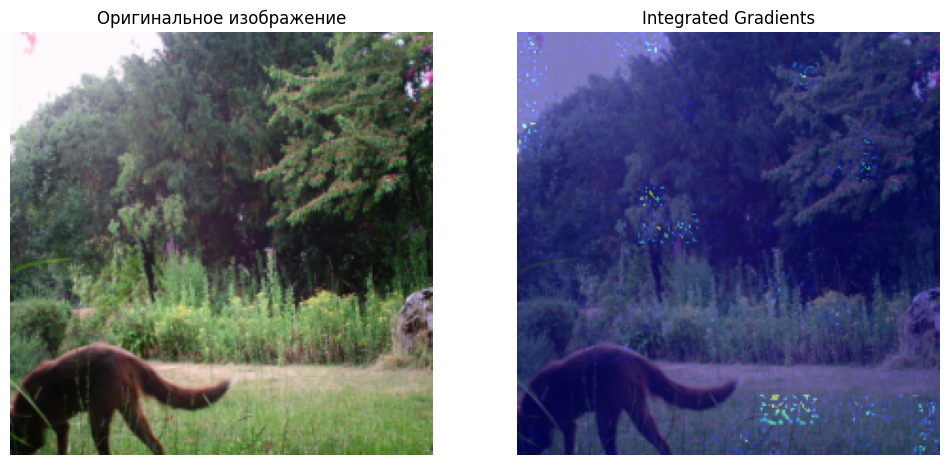

In [132]:
# Визуализация
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Оригинальное изображение
ax[0].imshow(image_denorm)
ax[0].axis('off')
ax[0].set_title('Оригинальное изображение')

# Карта атрибутов Integrated Gradients
ax[1].imshow(image_denorm)
ax[1].imshow(heatmap_resized, cmap='jet', alpha=0.5)  # Наложение тепловой карты
ax[1].axis('off')
ax[1].set_title('Integrated Gradients')

plt.show()


## визуализация ResNet

In [88]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
import numpy as np
from PIL import Image
import cv2

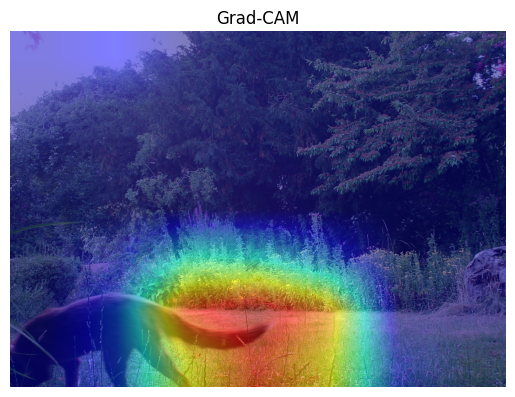

In [198]:
# Выберите слой, который хотите визуализировать
target_layer = model.layer4[-1]  # Последний слой ResNet перед классификацией

# Инициализация Grad-CAM
cam = GradCAM(model=model, target_layers=[target_layer])


image_path = "./dataset/cropped_dataset/20130722_202431_001.jpg"
pil_image = Image.open(image_path).convert('RGB')
input_tensor = transform(pil_image).unsqueeze(0)  # Преобразование изображения
input_tensor = input_tensor.to("cuda" if torch.cuda.is_available() else "cpu")

# Вычисление Grad-CAM
with cam:
    grayscale_cam = cam(input_tensor=input_tensor, targets=None)  # Можно задать конкретный target
grayscale_cam = grayscale_cam[0, :]  # Извлекаем карту для первого изображения в батче

# Преобразование изображения в массив
rgb_image = np.array(pil_image) / 255.0  # Нормализация для отображения

# Изменение размера grayscale_cam до размеров оригинального изображения
grayscale_cam_resized = cv2.resize(grayscale_cam, (rgb_image.shape[1], rgb_image.shape[0]))


# Наложение карты активации на изображение
cam_image = show_cam_on_image(rgb_image, grayscale_cam_resized, use_rgb=True)

# Отображение Grad-CAM
plt.imshow(cam_image)
plt.title("Grad-CAM")
plt.axis("off")
plt.show()

### Resnet

In [102]:
# Функция для визуализации Grad-CAM для всех слоев Resnet18
def visualize_grad_cam_for_layers(model, input_tensor, pil_image):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    # Получение всех слоев модели
    layers = [
        model.layer1[-1],  # Последний блок первого слоя
        model.layer2[-1],  # Последний блок второго слоя
        model.layer3[-1],  # Последний блок третьего слоя
        model.layer4[-1]   # Последний блок четвёртого слоя
    ]

    # Преобразование изображения для наложения
    rgb_image = np.array(pil_image) / 255.0  # Нормализация для отображения

    # Проход по каждому слою
    for i, target_layer in enumerate(layers):
        # Инициализация Grad-CAM
        cam = GradCAM(model=model, target_layers=[target_layer])

        # Вычисление Grad-CAM
        with cam:
            grayscale_cam = cam(input_tensor=input_tensor, targets=None)
        grayscale_cam = grayscale_cam[0, :]  # Извлекаем карту для первого изображения в батче

        # Изменение размера карты активации
        grayscale_cam_resized = cv2.resize(grayscale_cam, (rgb_image.shape[1], rgb_image.shape[0]))

        # Наложение карты активации на изображение
        cam_image = show_cam_on_image(rgb_image, grayscale_cam_resized, use_rgb=True)

        # Отображение Grad-CAM
        plt.figure(figsize=(6, 6))
        plt.imshow(cam_image)
        plt.title(f"Grad-CAM: Layer {i+1}")
        plt.axis("off")
        plt.show()

In [ ]:
def visualize_grad_cam_for_resnet50(model, input_tensor, pil_image):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = model.to(device)

    # Получение всех слоев ResNet-50 для анализа
    layers = [
        model.layer1[-1],  # Последний блок Conv2_x
        model.layer2[-1],  # Последний блок Conv3_x
        model.layer3[-1],  # Последний блок Conv4_x
        model.layer4[-1]   # Последний блок Conv5_x
    ]

    # Преобразование изображения для наложения
    rgb_image = np.array(pil_image) / 255.0  # Нормализация для отображения

    # Проход по каждому слою
    for i, target_layer in enumerate(layers):
        # Инициализация Grad-CAM
        cam = GradCAM(model=model, target_layers=[target_layer])

        # Вычисление Grad-CAM
        with cam:
            grayscale_cam = cam(input_tensor=input_tensor, targets=None)
        grayscale_cam = grayscale_cam[0, :]  # Извлекаем карту для первого изображения в батче

        # Изменение размера карты активации
        grayscale_cam_resized = cv2.resize(grayscale_cam, (rgb_image.shape[1], rgb_image.shape[0]))

        # Наложение карты активации на изображение
        cam_image = show_cam_on_image(rgb_image, grayscale_cam_resized, use_rgb=True)

        # Отображение Grad-CAM
        plt.figure(figsize=(6, 6))
        plt.imshow(cam_image)
        plt.title(f"Grad-CAM: Layer {i+1}")
        plt.axis("off")
        plt.show()

In [173]:
image_path = "./dataset/cropped_dataset/20130722_202431_001.jpg"
pil_image = Image.open(image_path).convert('RGB')

# Преобразование изображения в тензор
input_tensor = transform(pil_image).unsqueeze(0)  # Преобразование изображения
input_tensor = input_tensor.to("cuda" if torch.cuda.is_available() else "cpu")

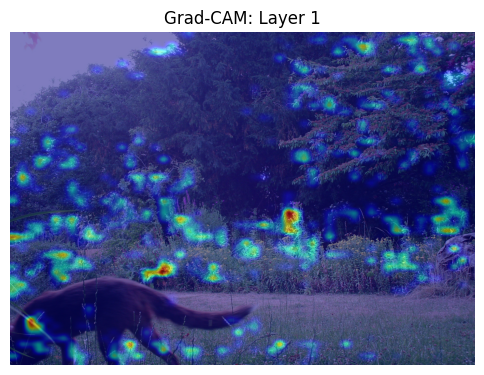

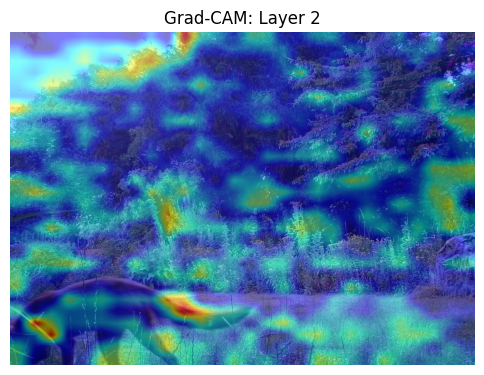

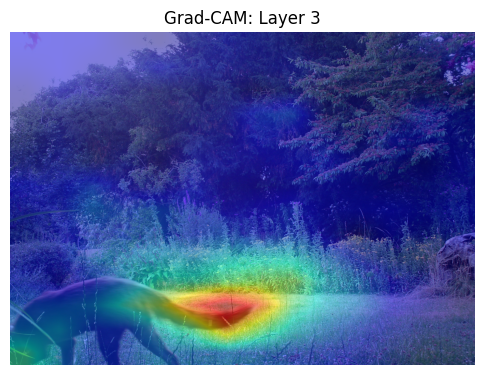

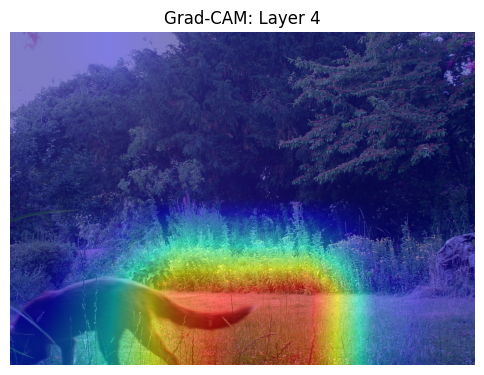

In [186]:
visualize_grad_cam_for_layers(model, input_tensor, pil_image)

In [187]:
image_path = "./dataset/cropped_dataset/20130722_195315.jpg"
pil_image = Image.open(image_path).convert('RGB')

# Преобразование изображения в тензор
input_tensor = transform(pil_image).unsqueeze(0)  # Преобразование изображения
input_tensor = input_tensor.to("cuda" if torch.cuda.is_available() else "cpu")

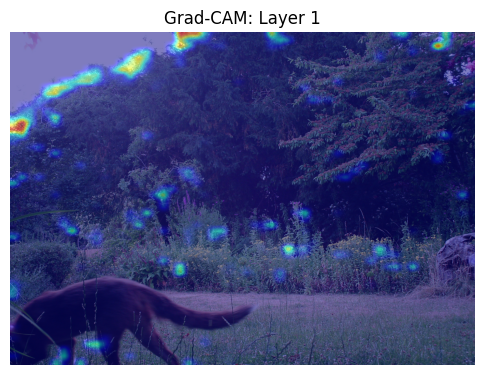

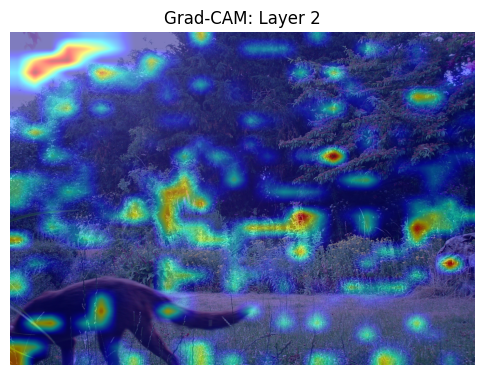

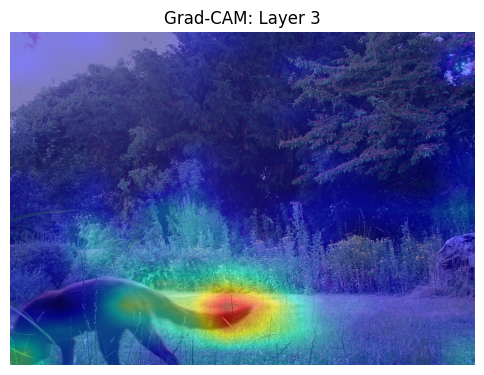

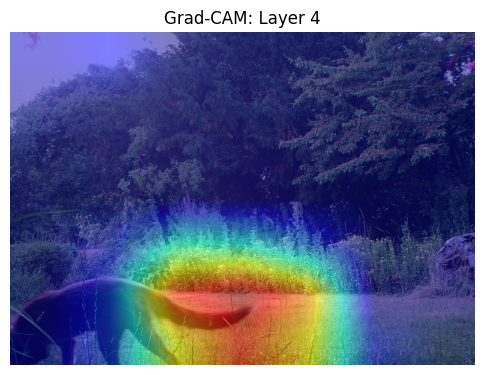

In [199]:
visualize_grad_cam_for_layers(model, input_tensor, pil_image)

In [110]:
from torchinfo import summary


In [197]:

# Вывод архитектуры модели
summary(model, input_size=(1, 3, 224, 224), col_names=["input_size", "output_size", "num_params"])


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
ResNet                                   [1, 3, 224, 224]          [1, 1]                    --
├─Conv2d: 1-1                            [1, 3, 224, 224]          [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 112, 112]         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           [1, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [1, 64, 56, 56]           [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           [1, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3      

In [108]:
from torchviz import make_dot
import torch


In [109]:
# Вычисление выходов модели
outputs = model(input_tensor)

# Визуализация архитектуры
dot = make_dot(outputs, params=dict(model.named_parameters()))
dot.format = "png"  # Формат изображения
dot.render("model_architecture")  #

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## обрезка фото

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Функция для отображения изображения с возможностью обрезки
def display_image_with_contours(image_path, crop_region=(50, 50, 500, 500)):
    # Загрузить изображение
    image = cv2.imread(image_path)
    if image is None:
        print("Не удалось загрузить изображение.")
        return

    # Преобразовать в градации серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Применить адаптивное пороговое преобразование
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Найти контуры
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Отобразить оригинальное изображение и контуры
    fig, ax = plt.subplots(figsize=(10, 10))

    # Наложить контуры на изображение
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 50 and h > 20:  # Настраиваемые параметры
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Выделить область обрезки (если задана)
    x, y, w, h = crop_region
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Красный прямоугольник

    # Преобразовать BGR в RGB для корректного отображения
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image_rgb)
    ax.set_title("Изображение с контурами и областью обрезки")
    ax.axis("off")
    plt.show()

In [16]:
image_path = "./dataset/./combined_dataset/20130718_211936_001.jpg"  # Замените на путь к вашему изображению
crop_region = (0, 0, 3264, 2340)  # Измените значения для подгонки

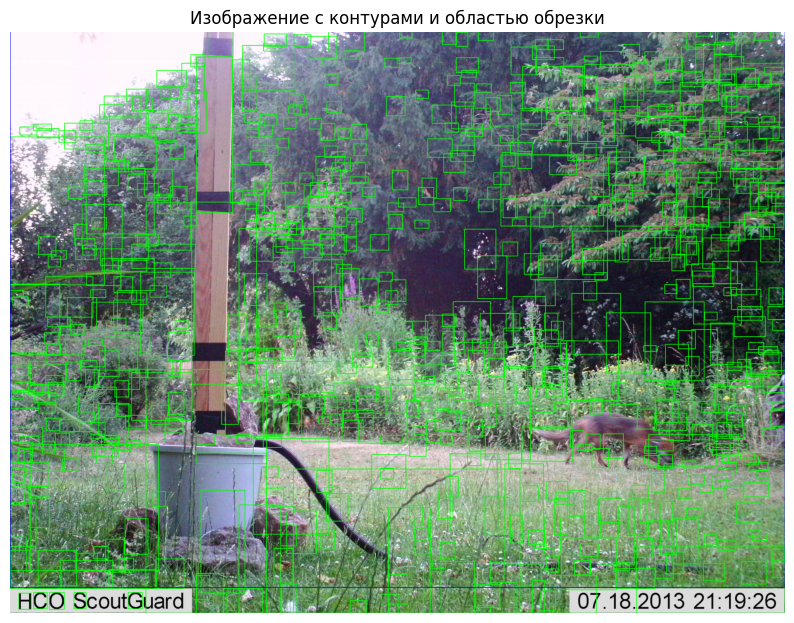

In [17]:
display_image_with_contours(image_path, crop_region=crop_region)

In [18]:
import os
import cv2

In [19]:
# Папка с исходными изображениями
input_dir = "./dataset/combined_dataset"
# Папка для сохранения обрезанных изображений
output_dir = "./dataset/cropped_dataset"

In [20]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [21]:
crop_region = (0, 0, 3264, 2340)

In [ ]:
for file_name in os.listdir(input_dir):
    input_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, file_name)

    try:
        # Читаем изображение
        img = cv2.imread(input_path)

        # Если изображение не удалось загрузить
        if img is None:
            print(f"Не удалось загрузить {file_name}. Пропуск.")
            continue

        # Обрезаем изображение
        x, y, w, h = crop_region
        cropped_img = img[y:y + h, x:x + w]

        # Сохраняем обрезанное изображение
        cv2.imwrite(output_path, cropped_img)
        print(f"Изображение {file_name} обрезано и сохранено.")
    except Exception as e:
        print(f"Ошибка при обработке {file_name}: {e}")

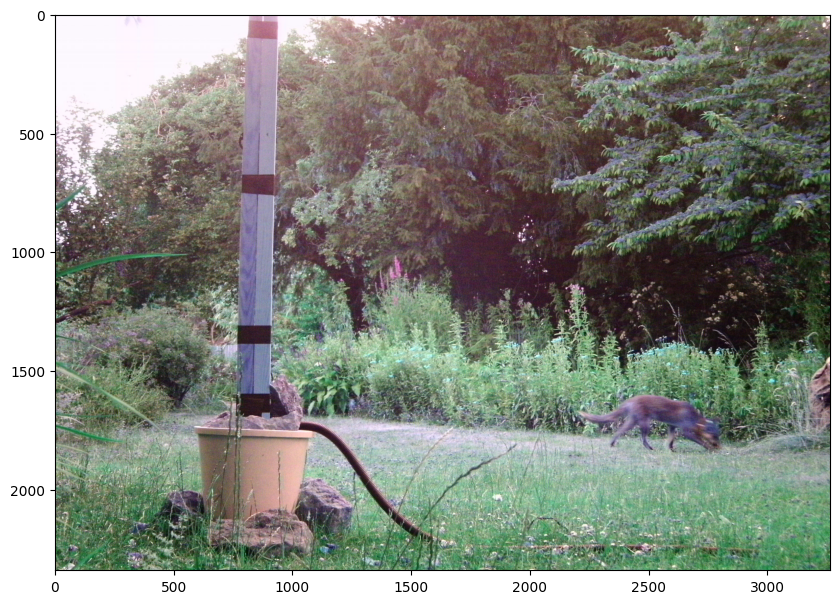

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.imread("./dataset/cropped_dataset/20130718_211936_001.jpg"))